# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image  # image 모듈의 imread(), imsave() 함수들 사용

from sklearn import datasets  # datasets 모듈의 함수들 사용
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# Python에서 이미지 파일 다루기

In [2]:
# scikit-learn 패키지의 예제 데이터 셋에서 제공하는 이미지 파일
china = datasets.load_sample_image('china.jpg')

In [3]:
type(china)  # jpg 형식이 아니라 numpy의 ndarray 타입

numpy.ndarray

In [4]:
china.shape  # (height, width, rgb/rgba)

(427, 640, 3)

이미지의 정보를 저장하고 있는 배열(ndarray)의 모양(shape)

* 흑백 이미지인 경우, 이미지 배열의 shape (height, width)
* 컬러 이미지의 경우
 * 불투명한 경우, 이미지 배열의 shape : (height, width, 3)
 * 투명도가 있는 경우 이미지 배열의 shape: (height, width, 4)
* 이미지 배열의 숫자 스케일
 * 0~255 정수 스케일
 * 0.0~1.0 실수 스케일


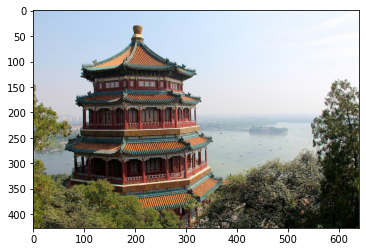

In [5]:
plt.imshow(china)
plt.show()

In [6]:
china[:, :, 0] # RGB 중에서 R의 크기

array([[174, 174, 174, ..., 250, 250, 250],
       [172, 173, 173, ..., 251, 251, 251],
       [174, 174, 174, ..., 252, 252, 252],
       ...,
       [ 88, 147, 122, ...,  39,   8,   6],
       [122, 129, 118, ...,   9,   9,  16],
       [116, 104, 108, ...,  43,  13,  15]], dtype=uint8)

In [7]:
# 0~ 255 스케일을 0.0~ 1.0 스케일로 변환
china_scaled = china/ 255
china_scaled[:,:,0] # # RGB 중에서 R의 크기

array([[0.68235294, 0.68235294, 0.68235294, ..., 0.98039216, 0.98039216,
        0.98039216],
       [0.6745098 , 0.67843137, 0.67843137, ..., 0.98431373, 0.98431373,
        0.98431373],
       [0.68235294, 0.68235294, 0.68235294, ..., 0.98823529, 0.98823529,
        0.98823529],
       ...,
       [0.34509804, 0.57647059, 0.47843137, ..., 0.15294118, 0.03137255,
        0.02352941],
       [0.47843137, 0.50588235, 0.4627451 , ..., 0.03529412, 0.03529412,
        0.0627451 ],
       [0.45490196, 0.40784314, 0.42352941, ..., 0.16862745, 0.05098039,
        0.05882353]])

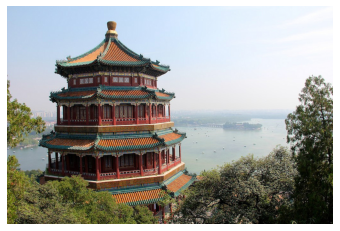

In [9]:
plt.imshow(china_scaled)
plt.axis('off') #스케일이 보이지 않게 하는 것
plt.show()

* matplot.image.imsave(fname, arr) : 파일 fname에 이미지 배열 arr을 이미지 형식(jpg,png,bmp, ...) 으로 저장하는 함수.
* matplot.image.imread(fname): 이미지 파일(jpg, png, ...)fname에서 이미지를 읽고 ndarray배열을 리턴.

In [10]:
# matplotlib.image 모듈의 imsave(file_name, array) 함수: 배열을 이미지 파일 형식으로 저장
image.imsave('china_copy.jpg', china_scaled) # colab 세션에 저장

In [14]:
# matplotlib.image 모듈의 imread(file_name) 함수: 이미지 파일을 읽어서 배열을 생성
img = image.imread('china_copy.jpg')

In [15]:
img.shape

(427, 640, 3)

이미지 자르기 - 배열 slicing

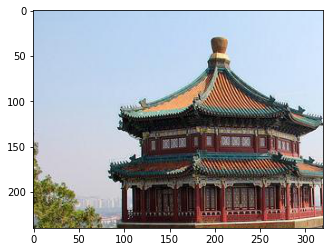

In [17]:
cropped = img[:240, :320, :]
plt.imshow(cropped)
plt.show()

# MNIST datasets

70,000개의 숫자(0~9) 손글씨 흑백 이미지(28x28)가 numpy 배열로 저장된 데이터셋

In [26]:
mnist = datasets.fetch_openml('mnist_784')
# as_frame=False 하게되면 numpy 배열로 리턴

In [19]:
type(mnist)

sklearn.utils.Bunch

In [20]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [21]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [28]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
mnist.target # 10개의 카테고리와 문자열로 저장

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [30]:
# 특성 행렬(2차원 배열), 타겟 (1차원) 배열
X, y = mnist['data'].values.copy(), mnist['target'].values.astype('int').copy()

In [47]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [34]:
X.shape # (이미지 샘플 개수, 세로*가로(28x28=784))

(70000, 784)

In [33]:
y.shape

(70000,)

# MNIST 데이터 시각화

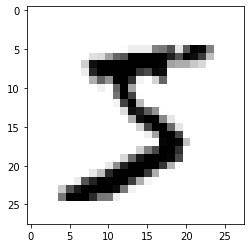

In [45]:
# 첫번째 샘플을 시각화
img_0 = X[0].reshape((28, 28))
plt.imshow(img_0, cmap=plt.cm.binary)  # cmap: color map
# cmap='binary' : white(0) ~ black(255, 또는 1.0)
# cmap='gray' : black(0)~ white(255, 또는 1.0)
plt.show()

## X[0] = (784,)
이렇게 되는 이유?

* X의 shape: (70_000, 784)
    * (샘플 개수, 이미지 1개의 픽셀 개수)
    * scikit-learn의 머신 러닝 모델들을 훈련시킬 때 특성 배열은 2차원 배열(n_samples, n_features)이어야 하기 때문에.
    * 3차원(70000,28,28)하게 되면 머신러닝이 훈련이 안되므로 (70000,28*28)으로 만듬. 
    * 그 중 한 장을 뺐으니 (784,)
    * 이미지를 콘솔에 출력하려면 1차원 배열을 2차원 배열로 다시 reshape.

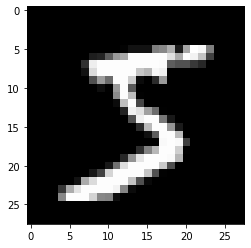

In [49]:
plt.imshow(img_0, cmap=plt.cm.gray)
plt.show()

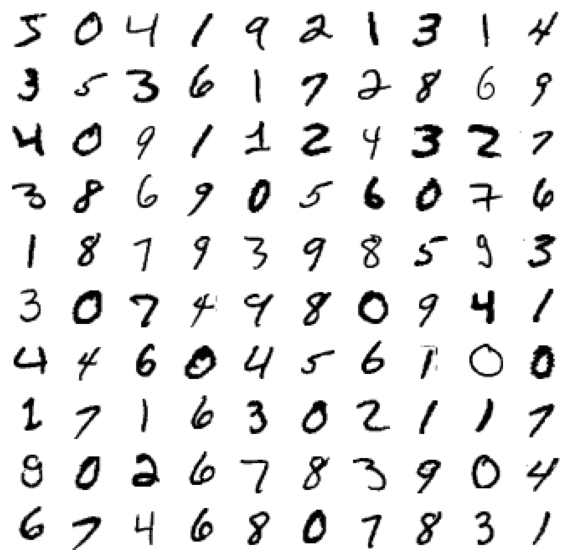

In [54]:
# 이미지 100개를 10x10 subplot에 시각화
fig, ax = plt.subplots(10,10, figsize=(10,10))
for i in range(10): # subplot의 row 인덱스를 0~9까지 반복
    for j in range(10): # subplot의 columns 인덱스를 0~9까지 반복
        img = X[i * 10 + j].reshape((28,28))  # 2차원 배열로 변환 -> 시각화
        ax[i,j].imshow(img, cmap=plt.cm.binary) # subplot에 숫자 이미지 출력
        ax[i,j].axis('off') # subplot의 좌표축 제거
plt.show()

In [58]:
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

# 훈련/테스트 셋 분리

* MNIST 데이터 셋은 이미지 데이터들이 무작위하게 섞여 있어서 순차 추출(sequential sampling)을 사용해도 됨.
* `train_test_split()` 함수 이용

In [55]:
train_size = 60_000  # 훈련 셋 샘플 개수(테스트 셋 샘플 개수: 10_000)
X_tr, X_te = X[:train_size], X[train_size:]
y_tr, y_te = y[:train_size], y[train_size:]

In [56]:
X_tr.shape, X_te.shape

((60000, 784), (10000, 784))

In [57]:
y_tr.shape, y_te.shape

((60000,), (10000,))

In [59]:
np.unique(y_tr, return_counts=True)
# True이면 각 고유 값의 개수 배열을 반환

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [60]:
np.unique(y_te, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

# 모델 선택, 훈련, 평가

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [62]:
knn = KNeighborsClassifier(n_jobs=-1)  # 모델 생성

In [63]:
knn.fit(X_tr,y_tr)

KNeighborsClassifier(n_jobs=-1)

In [64]:
# 훈련 셋 평가 점수(분류문제에서는 점수가 = 정확도)
knn.score(X_tr,y_tr)

0.9819166666666667

In [66]:
# confusion_matrix를 그리려면 예측값이 필요하다
tr_pred = knn.predict(X_tr)

KNN 단점

* 훈련에 소요되는 시간이 거의 없음.
* 훈련 샘플이 많을 수록 예측할 때 시간이 많이 소요됨.


In [67]:
confusion_matrix(y_tr, tr_pred)

array([[5893,    4,    2,    0,    1,    4,   14,    2,    1,    2],
       [   1, 6721,    7,    0,    0,    0,    1,    9,    1,    2],
       [  24,   36, 5821,   10,    7,    4,    6,   41,    6,    3],
       [   2,   12,   26, 6001,    0,   34,    2,   21,   17,   16],
       [   3,   39,    1,    1, 5724,    0,    6,    5,    2,   61],
       [  13,    5,    3,   35,    5, 5302,   38,    3,    3,   14],
       [  11,    9,    0,    0,    4,   12, 5882,    0,    0,    0],
       [   1,   46,   10,    2,    7,    0,    0, 6165,    0,   34],
       [  15,   59,   10,   40,   20,   51,   14,   11, 5591,   40],
       [  10,    6,    5,   22,   34,    9,    2,   39,    7, 5815]])

# 틀린 예측 분석

In [79]:
# 예측값과 실젯값이 다른 샘플들
X_wrong = X_tr[y_tr != tr_pred]
X_wrong.shape
# 틀린갯수 : 1085, pixel = 784

(1085, 784)

In [80]:
# 예측값과 실젯값이 다른 레이블들
y_wrong = y_tr[y_tr != tr_pred]
y_wrong.shape

(1085,)

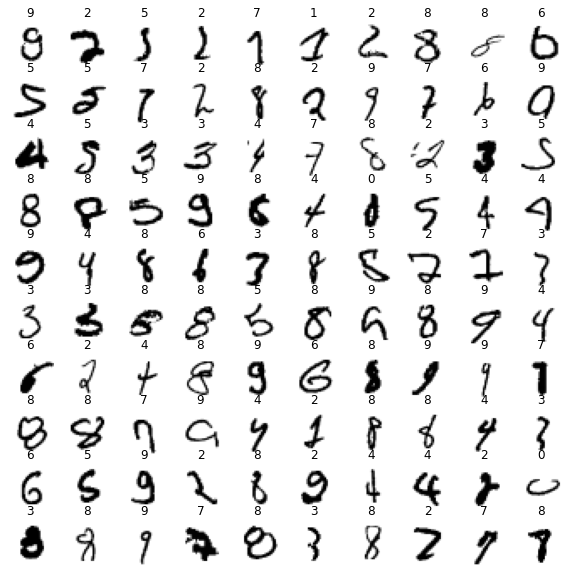

In [83]:
# 예측값이 틀린 샘플들 중 100개 시각화
fig, ax = plt.subplots(10,10, figsize=(10,10))

for i in range(10): # subplot의 row 인덱스를 0~9까지 반복
    for j in range(10): # subplot의 columns 인덱스를 0~9까지 반복
        img = X_wrong[i * 10 + j].reshape((28,28))  # 2차원 배열로 변환 -> 시각화
        ax[i,j].imshow(img, cmap=plt.cm.binary) # subplot에 숫자 이미지 출력
        ax[i,j].axis('off') # subplot의 좌표축 제거
        ax[i,j].set_title(y_wrong[i * 10 + j]) # 실제값과 비교
plt.show()

## confusion matrix 시각화

In [85]:
conf_mat = confusion_matrix(y_tr,tr_pred)
conf_mat

array([[5893,    4,    2,    0,    1,    4,   14,    2,    1,    2],
       [   1, 6721,    7,    0,    0,    0,    1,    9,    1,    2],
       [  24,   36, 5821,   10,    7,    4,    6,   41,    6,    3],
       [   2,   12,   26, 6001,    0,   34,    2,   21,   17,   16],
       [   3,   39,    1,    1, 5724,    0,    6,    5,    2,   61],
       [  13,    5,    3,   35,    5, 5302,   38,    3,    3,   14],
       [  11,    9,    0,    0,    4,   12, 5882,    0,    0,    0],
       [   1,   46,   10,    2,    7,    0,    0, 6165,    0,   34],
       [  15,   59,   10,   40,   20,   51,   14,   11, 5591,   40],
       [  10,    6,    5,   22,   34,    9,    2,   39,    7, 5815]])

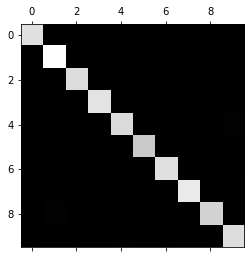

In [92]:
plt.matshow(conf_mat, cmap=plt.cm.gray) # 2차원 배열을 시각화
# cmap = 'gray': black(0) ~ white
plt.show()

위에서 시각화한 confusion matrix의 문제점:
 * 정확도가 98%이기 때문에, 대각선 이외의 셀들은 상대적으로 숫자가 너무 작음.
  * 거의 검은색으로만 보임.
  * 대각선을 0으로 대체.
   * 더많이 틀린 부분이 더 밝게 표현

In [93]:
np.fill_diagonal(conf_mat,0)
# 대각선 값을 모두 0으로 치환하는 함수
conf_mat

array([[ 0,  4,  2,  0,  1,  4, 14,  2,  1,  2],
       [ 1,  0,  7,  0,  0,  0,  1,  9,  1,  2],
       [24, 36,  0, 10,  7,  4,  6, 41,  6,  3],
       [ 2, 12, 26,  0,  0, 34,  2, 21, 17, 16],
       [ 3, 39,  1,  1,  0,  0,  6,  5,  2, 61],
       [13,  5,  3, 35,  5,  0, 38,  3,  3, 14],
       [11,  9,  0,  0,  4, 12,  0,  0,  0,  0],
       [ 1, 46, 10,  2,  7,  0,  0,  0,  0, 34],
       [15, 59, 10, 40, 20, 51, 14, 11,  0, 40],
       [10,  6,  5, 22, 34,  9,  2, 39,  7,  0]])

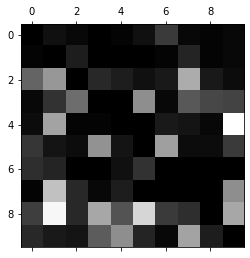

In [94]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()
# 숫자가 크면 클수록 더 밝게 보이는 시각화 적용

* 샘플들이 클래스(0,1,2, ..., 9 ) 마다 고르게 분포하지 않음.
 * 각 클래스에서 틀린 비율을 시각화
 * 행(row)별로 샘플 개수 합계를 구하고 각 셀의 값을 나눠줌.
* 대각선의 숫자들은 0으로 대체.

In [97]:
conf_mat = confusion_matrix(y_tr, tr_pred)
conf_mat
# keepdims : 차원을 맞춰서 dims을 더해준다.

array([[5893,    4,    2,    0,    1,    4,   14,    2,    1,    2],
       [   1, 6721,    7,    0,    0,    0,    1,    9,    1,    2],
       [  24,   36, 5821,   10,    7,    4,    6,   41,    6,    3],
       [   2,   12,   26, 6001,    0,   34,    2,   21,   17,   16],
       [   3,   39,    1,    1, 5724,    0,    6,    5,    2,   61],
       [  13,    5,    3,   35,    5, 5302,   38,    3,    3,   14],
       [  11,    9,    0,    0,    4,   12, 5882,    0,    0,    0],
       [   1,   46,   10,    2,    7,    0,    0, 6165,    0,   34],
       [  15,   59,   10,   40,   20,   51,   14,   11, 5591,   40],
       [  10,    6,    5,   22,   34,    9,    2,   39,    7, 5815]])

In [99]:
np.sum(conf_mat, axis=1, keepdims=True)

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [100]:
conf_mat_normalized = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)
conf_mat_normalized

array([[9.94934999e-01, 6.75333446e-04, 3.37666723e-04, 0.00000000e+00,
        1.68833361e-04, 6.75333446e-04, 2.36366706e-03, 3.37666723e-04,
        1.68833361e-04, 3.37666723e-04],
       [1.48323939e-04, 9.96885197e-01, 1.03826758e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.48323939e-04, 1.33491546e-03,
        1.48323939e-04, 2.96647879e-04],
       [4.02819738e-03, 6.04229607e-03, 9.77005707e-01, 1.67841558e-03,
        1.17489090e-03, 6.71366230e-04, 1.00704935e-03, 6.88150386e-03,
        1.00704935e-03, 5.03524673e-04],
       [3.26211059e-04, 1.95726635e-03, 4.24074376e-03, 9.78796281e-01,
        0.00000000e+00, 5.54558800e-03, 3.26211059e-04, 3.42521611e-03,
        2.77279400e-03, 2.60968847e-03],
       [5.13522766e-04, 6.67579596e-03, 1.71174255e-04, 1.71174255e-04,
        9.79801438e-01, 0.00000000e+00, 1.02704553e-03, 8.55871277e-04,
        3.42348511e-04, 1.04416296e-02],
       [2.39808153e-03, 9.22339052e-04, 5.53403431e-04, 6.45637336e-03,
   

In [103]:
np.fill_diagonal(conf_mat_normalized,0)
conf_mat_normalized

array([[0.        , 0.00067533, 0.00033767, 0.        , 0.00016883,
        0.00067533, 0.00236367, 0.00033767, 0.00016883, 0.00033767],
       [0.00014832, 0.        , 0.00103827, 0.        , 0.        ,
        0.        , 0.00014832, 0.00133492, 0.00014832, 0.00029665],
       [0.0040282 , 0.0060423 , 0.        , 0.00167842, 0.00117489,
        0.00067137, 0.00100705, 0.0068815 , 0.00100705, 0.00050352],
       [0.00032621, 0.00195727, 0.00424074, 0.        , 0.        ,
        0.00554559, 0.00032621, 0.00342522, 0.00277279, 0.00260969],
       [0.00051352, 0.0066758 , 0.00017117, 0.00017117, 0.        ,
        0.        , 0.00102705, 0.00085587, 0.00034235, 0.01044163],
       [0.00239808, 0.00092234, 0.0005534 , 0.00645637, 0.00092234,
        0.        , 0.00700978, 0.0005534 , 0.0005534 , 0.00258255],
       [0.00185874, 0.00152078, 0.        , 0.        , 0.0006759 ,
        0.00202771, 0.        , 0.        , 0.        , 0.        ],
       [0.00015962, 0.00734238, 0.0015961

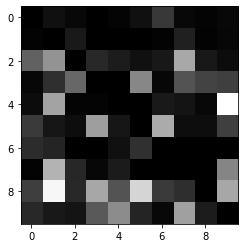

In [105]:
plt.imshow(conf_mat_normalized, cmap=plt.cm.gray)
plt.show()
# 1행에서 가장 밝은 부분은 6 
# 0을 6으로 잘못예측한 확률이 높다는 것을 알 수 있다.

# LogisticRegression

In [124]:
logit = LogisticRegression(random_state=42, n_jobs=-1)

In [125]:
logit.fit(X_tr,y_tr)

LogisticRegression(n_jobs=-1, random_state=42)

In [126]:
logit.coef_.shape # 기울기 계수가 10개

(10, 784)

In [128]:
logit.intercept_.shape # y절편 10

(10,)

In [129]:
tr_pred = logit.predict(X_tr)

In [130]:
logit.score(X_tr,y_tr) # 훈련값에서의 정확도

0.9339166666666666

In [131]:
logit.score(X_te,y_te) # 실제값에서의 정확도

0.9255

In [133]:
conf_mat = confusion_matrix(y_tr, tr_pred)
conf_mat

array([[5764,    0,   15,    9,   14,   36,   33,   10,   38,    4],
       [   1, 6584,   32,   19,    6,   20,    3,   10,   55,   12],
       [  28,   47, 5445,   89,   61,   20,   56,   51,  140,   21],
       [  17,   23,  118, 5582,    6,  162,   14,   50,  119,   40],
       [  13,   22,   23,    9, 5491,    8,   48,   15,   42,  171],
       [  57,   18,   40,  161,   48, 4793,   82,   15,  160,   47],
       [  34,    9,   40,    0,   35,   58, 5713,    4,   21,    4],
       [  11,   20,   58,   28,   42,    8,    4, 5896,   20,  178],
       [  27,   93,   55,  122,   19,  136,   36,   18, 5293,   52],
       [  21,   22,   14,   70,  129,   33,    3,  138,   45, 5474]])

## reg 시각화

In [134]:
conf_mat_normalized = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)
conf_mat_normalized

array([[9.73155496e-01, 0.00000000e+00, 2.53250042e-03, 1.51950025e-03,
        2.36366706e-03, 6.07800101e-03, 5.57150093e-03, 1.68833361e-03,
        6.41566774e-03, 6.75333446e-04],
       [1.48323939e-04, 9.76564818e-01, 4.74636606e-03, 2.81815485e-03,
        8.89943637e-04, 2.96647879e-03, 4.44971818e-04, 1.48323939e-03,
        8.15781667e-03, 1.77988727e-03],
       [4.69956361e-03, 7.88855321e-03, 9.13897281e-01, 1.49378986e-02,
        1.02383350e-02, 3.35683115e-03, 9.39912722e-03, 8.55991944e-03,
        2.34978181e-02, 3.52467271e-03],
       [2.77279400e-03, 3.75142717e-03, 1.92464525e-02, 9.10455064e-01,
        9.78633176e-04, 2.64230957e-02, 2.28347741e-03, 8.15527646e-03,
        1.94095580e-02, 6.52422117e-03],
       [2.22526532e-03, 3.76583362e-03, 3.93700787e-03, 1.54056830e-03,
        9.39917836e-01, 1.36939404e-03, 8.21636426e-03, 2.56761383e-03,
        7.18931873e-03, 2.92707977e-02],
       [1.05146652e-02, 3.32042059e-03, 7.37871241e-03, 2.96993175e-02,
   

In [135]:
np.fill_diagonal(conf_mat_normalized,0)
conf_mat_normalized

array([[0.        , 0.        , 0.0025325 , 0.0015195 , 0.00236367,
        0.006078  , 0.0055715 , 0.00168833, 0.00641567, 0.00067533],
       [0.00014832, 0.        , 0.00474637, 0.00281815, 0.00088994,
        0.00296648, 0.00044497, 0.00148324, 0.00815782, 0.00177989],
       [0.00469956, 0.00788855, 0.        , 0.0149379 , 0.01023834,
        0.00335683, 0.00939913, 0.00855992, 0.02349782, 0.00352467],
       [0.00277279, 0.00375143, 0.01924645, 0.        , 0.00097863,
        0.0264231 , 0.00228348, 0.00815528, 0.01940956, 0.00652422],
       [0.00222527, 0.00376583, 0.00393701, 0.00154057, 0.        ,
        0.00136939, 0.00821636, 0.00256761, 0.00718932, 0.0292708 ],
       [0.01051467, 0.00332042, 0.00737871, 0.02969932, 0.00885445,
        0.        , 0.01512636, 0.00276702, 0.02951485, 0.00866999],
       [0.00574518, 0.00152078, 0.00675904, 0.        , 0.00591416,
        0.00980061, 0.        , 0.0006759 , 0.0035485 , 0.0006759 ],
       [0.00175579, 0.00319234, 0.0092577

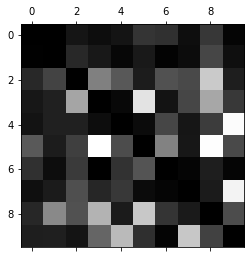

In [136]:
plt.matshow(conf_mat_normalized, cmap=plt.cm.gray)
plt.show()

# SGDClassifier

In [114]:
sgd = SGDClassifier(n_jobs=-1)

In [115]:
sgd.fit(X_tr,y_tr)

SGDClassifier(n_jobs=-1)

In [116]:
sgd.score(X_tr,y_tr)

0.88265

In [120]:
sgd.score(X_te,y_te)

0.8679

In [117]:
tr_pred = sgd.predict(X_tr)

In [118]:
confusion_matrix(y_tr,tr_pred)

array([[5870,    0,    5,    4,    0,    5,    5,    0,   17,   17],
       [   3, 6367,   35,    8,    3,   27,   10,    8,  215,   66],
       [ 113,   48, 4914,  174,   57,   36,   89,   57,  312,  158],
       [  47,   19,   98, 4934,   11,  394,   21,   39,  162,  406],
       [  86,   16,    5,    4, 5104,   13,   24,    7,  110,  473],
       [ 136,   19,   25,  159,   43, 4446,   81,   22,  303,  187],
       [ 136,    8,   11,   10,   14,   92, 5579,    3,   46,   19],
       [  42,   12,   17,    9,   31,   11,    5, 5416,   34,  688],
       [  69,   62,   19,  144,   22,  312,   35,    9, 4725,  454],
       [  52,   10,    8,   24,   70,   59,    2,   72,   48, 5604]])